# TD 02

## But

Nous allons manipuler l'interface graphique pygame. Vous pouvez tout faire depuis le notebook, ou alors utiliser votre éditeur préféré et lancer votre script comme vous le faites habituellement. Nous allons aussi manipuler un peu d'aléatoire.

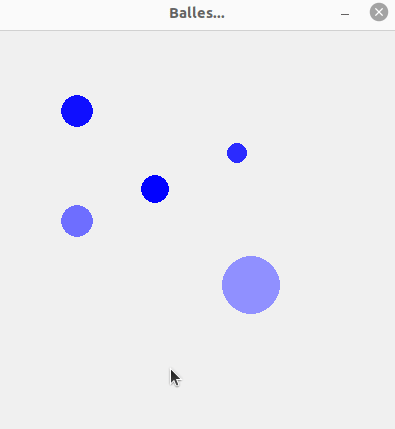

## I. Importer les modules

Dans la cellule ci-dessous, faites l'importation des deux modules dont on aura besoin :

In [ ]:
# Ici vos 2 import


## II. Définir les objets 

### Q1. Objet `Animation`

Créer un objet `Animation`, dont l'initialiseur prend un paramètre entier qui sera le nombre de balles créées au lancement de l'animation. Cet objet doit déclarer les propriétés suivantes :

- `ecran` : la fenêtre pygame principale de taille $600\times 600$
- `balles` : une liste de balles, vide pour l'instant
- `end` : un booléen initialisé à `False` et qui servira pour stopper l'animation
- `pause` : un booléen initialisé à `False` et qu iservira à mettre l'animation sur pause.

### Q2. Ajout de méthodes

#### Les couleurs

Définissez quelques constantes de couleur en utilisant `pygame.Color(r, v, b)` ou `pygame.Color(nom_couleur)`. Par exemple une couleur `COULEUR_FOND` pour le fond de votre fenêtre graphique.

Définissez aussi une méthode permettant d'obtenir une couleur aléatoirement. Soit complètement aléatoire, soit dans une teinte (comme dans l'animation de l'exemple). On rappelle que `random.randint(a, b)` donne un entier entre `a` et `b` (inclus).

#### Réglages

Dans une méthode `reglages` effectuer les actions suivantes :

1. initialiser les sous-modules de `pygame` (via `pygame.init()`)
2. changer le titre de votre fenêtre
3. changer la couleur du fond

#### La boucle d'animation

Écrire une méthode `start` qui réalise les actions suivantes :

1. lancement des réglages
2. Tant que ce n'est pas la fin :
    - attendre un petit délai (10-15 ms est une bonne valeur)
    - effacer l'écran
    - lancer l'animation des objet (nous préciserons plus tard en quoi il s'agit)
    - dessiner les choses
    - rafraîchir l'écran
    - traiter les événements : pour l'instant le seul que nous ayons est de quitter l'animation quand on ferme la fenêtre

### Q3. Objet `Balle`

Définir un objet `Balle` dont l'initialisateur prend les arguments suivants pour initialiser les propriétés :

- `ecran` : la référence vers la fenêtre principale
- `rayon` : un entier qui est le rayon de la balle, on choisir aléatoirement entre deux constantes `RAYON_MIN` et `RAYON_MAX` (de bonnes valeurs sont par exemple 10 et 30)
- `couleur` : la couleur de la balle (choisie aussi aléatoirement à la création)
- `position` : est un couple pour initialiser `self.x` et `self.y` les coordonnées du centre de la balle (du cercle)
- `vitesse` : un couple qui représente le vecteur vitesse `self.vx, self.vy` qui sont les valeurs à ajouter à `self.x` et `self.y` pour faire changer la balle de position

### Q4. Ajouter les méthodes de l'objet `Balle`

Définir les méthodes suivantes :

- `position` qui renvoie le couple des coordonnées $(x, y)$ du centre de la balle
- `se_dessine`  qui dessine le disque correspondant à la balle (on regardera la [doc de _circle_](https://devdocs.io/pygame/ref/draw#pygame.draw.circle))
- `bouge` qui ajoute aux coordonnées du centre, les valeurs du vecteur `vitesse` puis qui teste les collisions éventuelles avec les bords de la fenêtre

#### Les collisions

Il y a une collision avec le mur Est si la coordonnée $x$ est telle que $x \geq L - r$ où $L$ est la largeur de la fenêtre et $r$ le rayon du cercle. De façon analogue, déterminer quand il y collision sur les autres murs. 

Lorsqu'une collision est détectée, la balle doit repartir dans l'autre sens avec un angle de 90° par rapport à sa direction initiale avant la collision. Cela est obtenu en multipliant par -1 la composante du vecteur vitesse concernée (donc la composante $x$ pour les murs Est et Ouest et la composante $y$ pour les deux autres).

En déduire la définition des 4 méthodes : `collision_est`, `collision_ouest` etc. ces méthodes renvoient `True` en cas de collision détectée.

Terminer la définition de la méthode `bouge` est faisant ce qu'il faut sur les coordonnées du centre et sur les coordonnées du vecteur vitesse en cas de collision.

### Q5. Terminer l'objet `Animation`

Revenez à l'initialiseur de `Animation` pour ajouter la construction de la liste des balles. Complétez aussi les autres méthodes et testez votre animation.

### Q6. Personnalisation

Ajoutez la gestion d'événements pour changer les couleurs des balles, pour en ajouter au clic souris par exemple, pour mettre l'animation en pause, puis la relancer etc. 

In [1]:
"""
balles.py

Une mini animation de balles rebondissantes. Utilisation de pygame
"""

# ---
# --- IMPORT

import random
import pygame


# ---
# --- CONSTANTES

DIM = 600
CENTRE = DIM // 2, DIM // 2
RAYON_MIN = 10
RAYON_MAX = 50
VITESSE_MIN = 2
VITESSE_MAX = 5

GRIS_CLAIR = pygame.Color(240, 240, 240)
BLANC = pygame.Color('white')
COULEUR_FOND = GRIS_CLAIR
DELAI_MS = 10

ROUGE = 0
VERT = 1
BLEU = 2

# sert pour le changement de couleur : touche R = les balles sont rouges, V vertes, B bleues
TEINTES = {pygame.K_r: ROUGE, pygame.K_v: VERT, pygame.K_b: BLEU}

# ---
# --- FONCTIONS UTILITAIRES

def alea(a, b):
    return random.randint(a, b)

# ---
# --- CLASSES

class Balle:

    def __init__(self, ecran, rayon, couleur, position, vitesse):
        self.ecran = ecran
        self.rayon = rayon
        self.couleur = couleur
        self.x, self.y = position
        self.vx, self.vy = vitesse

    def position(self):
        return self.x, self.y

    def se_dessine(self):
        pygame.draw.circle(self.ecran, self.couleur, self.position(), self.rayon)

    def collision_mur_est(self):
        return self.x >= DIM - self.rayon    

    def collision_mur_ouest(self):
        return self.x <= self.rayon    

    def collision_mur_nord(self):
        return self.y <= self.rayon    

    def collision_mur_sud(self):
        return self.y >= DIM - self.rayon    


    def bouge(self):
        self.x += self.vx
        self.y += self.vy
        if self.collision_mur_est():
            self.x = DIM - self.rayon
            self.vx = -self.vx
        if self.collision_mur_ouest():
            self.x = self.rayon
            self.vx = -self.vx
        if self.collision_mur_nord():
            self.y = self.rayon
            self.vy = -self.vy
        if self.collision_mur_sud():
            self.y = DIM - self.rayon
            self.vy = -self.vy

class Animation:

    def __init__(self, nb_balles, teinte=BLEU):
        self.ecran = pygame.display.set_mode((DIM, DIM))
        self.teinte = teinte
        self.balles = [Balle(self.ecran, alea(RAYON_MIN, RAYON_MAX), 
            self.monochrome(self.teinte),
            CENTRE, 
            (-1**alea(1,2)*alea(VITESSE_MIN, VITESSE_MAX), -1**alea(1,2)*alea(VITESSE_MIN, VITESSE_MAX))) for _ in range(nb_balles)]
        self.end = False
        self.pause = False

    def reglages(self):
        pygame.init()
        pygame.display.set_caption('Balles...')
        self.ecran.fill(COULEUR_FOND)        

    def monochrome(self, teinte):
        autres = alea(0, 150)
        if teinte == ROUGE:
            return pygame.Color(255, autres, autres)
        if teinte == VERT:
            return pygame.Color(autres, 255, autres)
        if teinte == BLEU:
            return pygame.Color(autres, autres, 255)

    def couleur_alea(self):
        return pygame.Color(alea(0, 255), alea(0, 255), alea(0, 255))

    def ajoute_balle(self):
        """ajoute une balle suivant les même règles de création que pour les premières"""
        self.balles.append(Balle(self.ecran, alea(RAYON_MIN, RAYON_MAX), 
            self.monochrome(self.teinte),
            CENTRE, 
            (-1**alea(1,2)*alea(VITESSE_MIN, VITESSE_MAX), -1**alea(1,2)*alea(VITESSE_MIN, VITESSE_MAX))))

    def change_teinte(self, teinte):
        """teinte vaut 0, 1 ou 2... change la teinte de toutes les balles présentes, et des futures"""
        self.teinte = teinte
        for balle in self.balles:
            balle.couleur = self.monochrome(teinte)

    def se_dessine(self):
        """demander aux balles de se dessiner"""
        for balle in self.balles:
            balle.se_dessine()

    def anime(self):
        """demander aux balles de bouger"""
        for balle in self.balles:
            balle.bouge()

    def efface(self):
        self.ecran.fill(COULEUR_FOND)        

    def delai(self):
        pygame.time.delay(DELAI_MS)

    def refresh(self):
        pygame.display.flip()            

    def stop(self):
        pygame.quit()

    def gerer_clavier(self, event):
        if event.key == pygame.K_SPACE:
            self.pause = not self.pause
        elif event.key == pygame.K_q:
            self.end = True
        elif event.key in TEINTES:
            # touches définies parmi les constantes
            self.change_teinte(TEINTES[event.key])

    def gerer_evenements(self):
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                self.end = True
            if event.type == pygame.MOUSEBUTTONUP:
                self.ajoute_balle()
            if event.type == pygame.KEYDOWN:
                self.gerer_clavier(event)

    def start(self):
        self.reglages()
        while not self.end:
            if not self.pause:
                self.delai()
                self.efface()
                self.anime()
                self.se_dessine()
                self.refresh()
            self.gerer_evenements()
        self.stop()


pygame 2.1.2 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Exemple

On crée une animation avec un nombre de balles puis on lance l'animation :

In [2]:
test = Animation(10)
test.start()